In [ ]:
## Som ##
##### Topological orering of funds #####


In [ ]:
import numpy as np
from scipy import signal
import math
import matplotlib.pyplot as plt

In [96]:
import numpy as np

class SOMNetwork:
    
    def __init__(self, n=100, epochs = 1, eta=9, hood = 20):
        self.W = np.random.rand(n,210)
        self.n = n
        self.epochs = epochs
        self.eta = eta
        self.hood = hood
        self.props = np.reshape(np.loadtxt( 'funds.dat', delimiter=','), (-1, 210))
        self.fundnames = np.char.strip(np.loadtxt( 'fundnames.txt', delimiter='\t\n', dtype=str), '\'\t')
        self.nums = self.props.shape[0]
    
    def min_distance(self, fund):
        dist = np.zeros(100)
        for i in range(100):
            dist[i] = np.linalg.norm(fund - self.W[i])
        return np.argmin(dist)
    
    
    def modify_weights(self, index, fund, epoch):
        radius = int((self.hood/2 - epoch))
        radius = radius if radius > 0 else 0
        self.W[index,:] += self.eta*(fund - self.W[index,:])
        for i in range(radius):
            proximity = (radius - (i/radius)*radius)/radius
            lower  = index-1-i
            higher = index+1+i
            if(lower>=0):
                self.W[lower,:] += (self.eta*(fund - self.W[lower,:]))
            if(higher<self.n):
                self.W[higher,:] += (self.eta*(fund - self.W[higher,:]))
        
        
    def train(self):
        for i in range(self.epochs):
            for j in range(self.nums):
                fund = self.props[j]
                best = self.min_distance(fund)
                self.modify_weights(best, fund, i)
    
    
    def output(self):
        out = []
        for i in range(self.nums):
            out.append((self.min_distance(self.props[i]), self.fundnames[i]))
        
        out = sorted(out, key=lambda tup: tup[0])
        for i in range(self.nums):
            print(out[i][1])
            
             
network = SOMNetwork()              
network.train()
network.output()

Swedbank Robur Ny Teknik A
BGF Next Generation Technology A2 USD
MS INVF US Growth A
MS INVF Global Advantage A
Enter Småbolagsfond A
MS INVF US Advantage A
Franklin Technology A Acc USD
SPP Global Solutions A
Öhman Global Growth
Handelsbanken Hållbar Energi A1 SEK
Swedbank Robur Transition Energy A
Thematica – Future Mobility Retl SEK Acc
Proethos Fond
Allianz Global Artfcl Intlgc AT EUR
AuAg Silver Bullet A


In [196]:
#run this first

import numpy as np
import matplotlib.pyplot as plt

funds = np.reshape(np.loadtxt('funds.dat', delimiter=','), (-1, 210))
#fundnames = np.char.strip(np.loadtxt( 'fundnames.txt', delimiter='\t\n', dtype=str), '\'\t')
empty = np.array([''], dtype=str)
fundnames = np.char.strip(np.loadtxt( 'nums.txt', delimiter='\n', dtype=str))
fundnames

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15'], dtype='<U2')

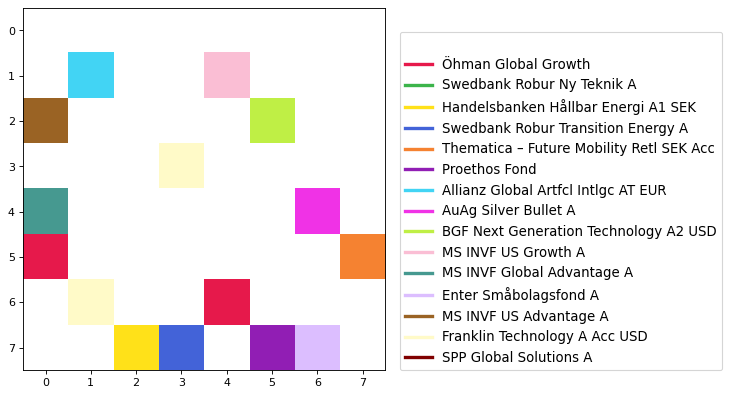

In [219]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import random


class MPNetwork:
    def __init__(self, funds, fundnames, n, epochs, eta, hood):
        self.W = np.random.rand(n, n, 210)
        self.n = n
        self.epochs = epochs
        self.eta = eta
        self.hood = hood
        self.funds = funds
        self.fundnames = fundnames

        self.nums = self.funds.shape[0]
        
    def min_distance(self, mp):
        dist = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                dist[i][j] = np.linalg.norm(mp - self.W[i][j])
        return np.unravel_index(dist.argmin(), dist.shape)
    
    def modify_weights(self, a, b, mp, epoch):
        radius = int((self.hood/2 - epoch))
        radius = radius if radius > 0 else 0
        self.W[a,b,:] += self.eta*(mp - self.W[a,b,:])
        
        for i in range(self.n):
            for j in range(self.n):
                if(np.abs(a-i) + np.abs(b-j) <= radius):
                    self.W[i,j,:] += self.eta*(mp - self.W[i,j,:])
        
    def train(self):
        for i in range(self.epochs):
            for j in range(self.nums):
                mp = self.funds[j]
                a, b = self.min_distance(mp)
                self.modify_weights(a, b, mp, i)
    
    def plot_things(self, out, colors, labels):
        cmap = ListedColormap(colors)
        plt.figure(figsize=(6, 6), dpi=80)
        plt.imshow(out, vmin=0, vmax=len(cmap.colors), cmap=cmap)
        
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
        plt.legend(lines, labels, loc=(1.04,0), prop={'size': 12})


        plt.show()
    
    def print_fundnames(self, out):
        colors = ['#ffffff', '#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9',  '#000000'] 
        number_of_colors = 16

        #colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             #for i in range(number_of_colors)]
        colors[0] = 'white'
        labels = np.char.strip(np.loadtxt( 'fundnames.txt', delimiter='\t\n', dtype=str), '\'\t')
        #labels = ['', '1', '2', '3', '4', '5', '6','7','8','9','10', '11', '12','13','14','15']
        self.plot_things(out, colors, labels)
    
    def output(self):
        out_party = np.zeros((self.n, self.n))
        for i in range(self.nums):
            x, y = self.min_distance(self.funds[i])
            out_party[x][y] = self.fundnames[i]
        
        self.print_fundnames(out_party)

              
        
network = MPNetwork(funds, fundnames, n=8, epochs = 20, eta=0.2, hood = 10)
network.train()
network.output()